## Aula 1

In [1]:
#Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

In [2]:
passageiros = pd.read_csv('./data/Passageiros.csv')

In [3]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
#Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados. 
import seaborn as sns
import matplotlib.pyplot as plt

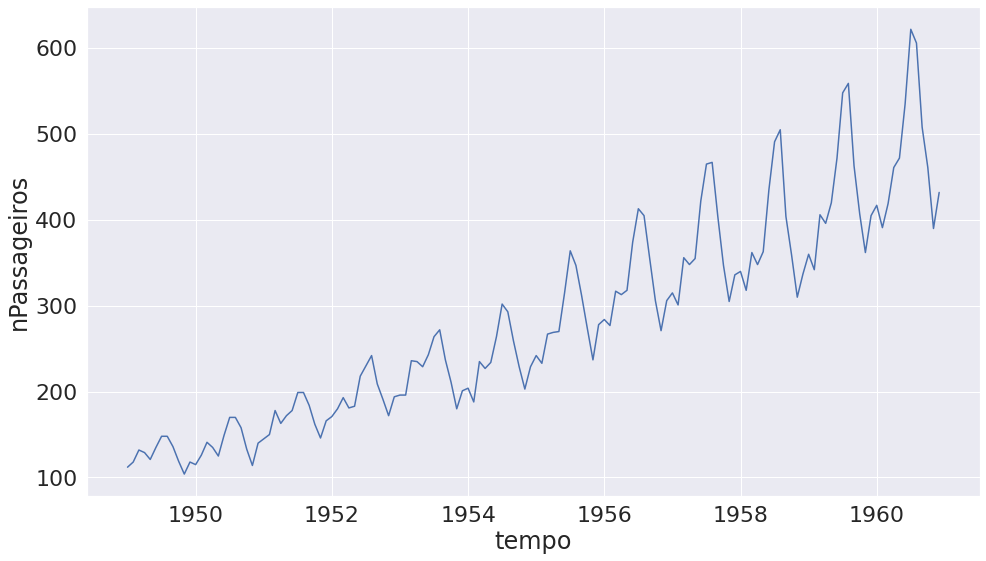

In [5]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

In [6]:
#Seleciona todas as colunas menos a última
Tempo = passageiros.iloc[:,:-1].values

In [7]:
nPassageiros = passageiros.iloc[:,1].values

In [8]:
#Podemos separar parte dos dados para treino e teste
from sklearn.model_selection import train_test_split

In [9]:
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                                      test_size = 0.3)

In [10]:
from sklearn import linear_model

In [11]:
regressor = linear_model.LinearRegression()

In [12]:
#Ajustando a reta aos dados de treino
regressor.fit(Tempo_treino,nPassageiros_treino)

LinearRegression()

In [13]:
nPassageiros_predito = regressor.predict(Tempo_teste)

In [14]:
import numpy as np

In [15]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o 
# Seaborn
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })


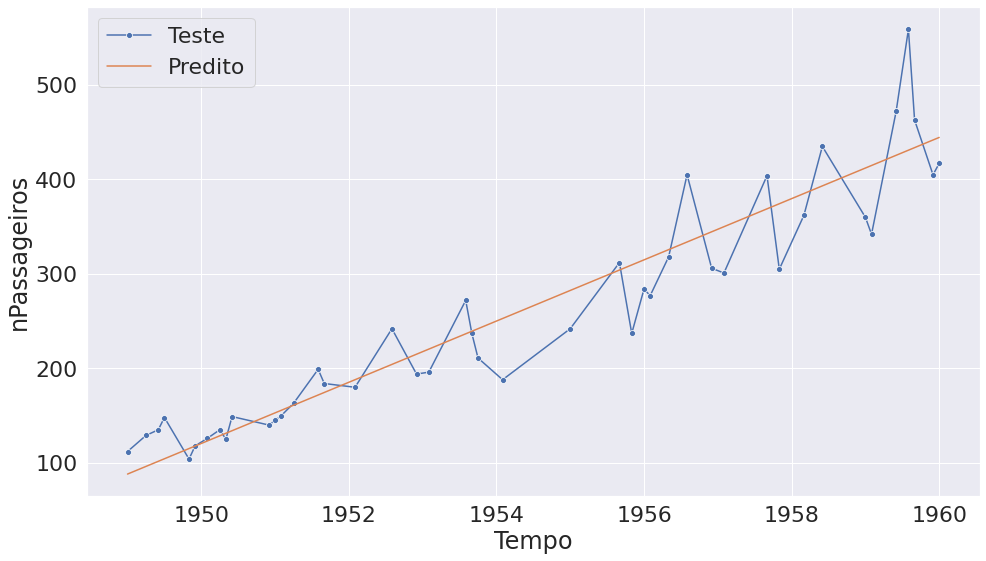

In [16]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

## Aula 2

In [17]:
regressor.coef_


array([32.39886652])

In [18]:
regressor.intercept_

-63057.267728690655

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2 = r2_score(nPassageiros_teste, nPassageiros_predito)
print(f'Variavel R2 para avaliar/explicar o ajuste da linha prevista: {r2:.2f}')

Variavel R2 para avaliar/explicar o ajuste da linha prevista: 0.88


In [21]:
from sklearn.svm import SVR

In [22]:
regressor_svr = SVR(C=10000000000000)

In [ ]:
regressor_svr.fit(Tempo_treino, nPassageiros_treino)

In [ ]:
nPassageiros_predito_svr = regressor_svr.predict(Tempo_teste)

In [ ]:
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito_svr,})

In [ ]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito_svr, label = "Predito" )

In [ ]:
r2_score(nPassageiros_teste, nPassageiros_predito_svr)

In [ ]:
r2_score(nPassageiros_teste, nPassageiros_predito)

